# DataSets & DataLoaders

Pytorch는 torch.utils.data.DataLoader와 torch.utils.data.Dataset의 두가지 기본 요소를 제공한다. Dataset은 sample과 label을 저장하고, DataLoader는 Dataset을 샘플에 쉽게 접근할 수 있도록 iterable로 감싼다.

## Loading a Dataset

TorchVision에서 Fashion-MNIST 데이터셋을 불러오는 예제를 보자.

- root는 학습/테스트 데이터가 저장되는 경로
- train은 학습용 또는 테스트용 데이터셋 여부를 지정
- download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드
- transform과 target_transform은 feature와 label transform을 지정한다.

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

Dataset에 리스트처럼 직접 접근할 수 있다.

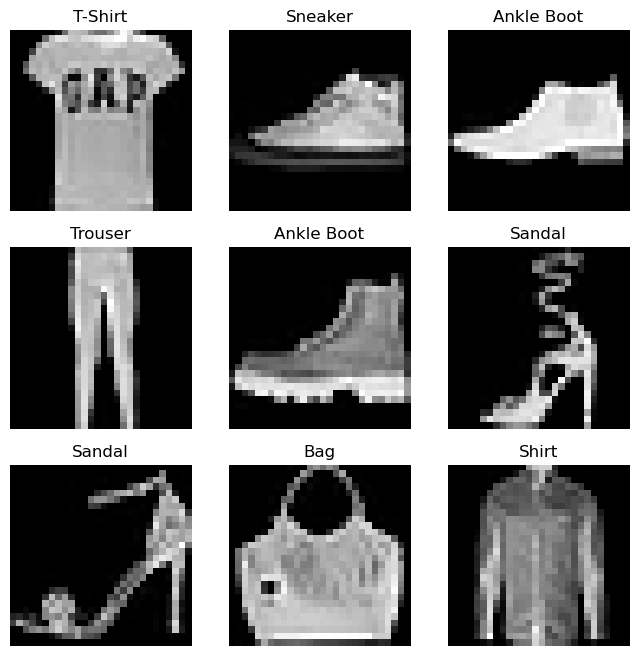

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files

Custom Dataset class는 \_\_init\_\_, \_\_len\_\_, \_\_getitem\_\_ 을 구현해야 한다. 아래 구현을 살펴보면 FashionMNIST 데이터들은 img_dir에, label들은 annotations_file이라는 csv 파일에 별도로 저장된다.

In [6]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing your data for training with DataLoaders

Dataset은 데이터셋의 feature를 가져오고 하나의 샘플에 label을 지정하는 일을 한번에 한다. 모델 학습 시 일반적으로 샘플들을 minibatch로 전달하고, 매 에폭마다 데이터를 다시 섞어서 과적합을 막고, Python의 multiprocessing을 사용해 데이터 검색 속도를 높이려고 한다.

DataLoader는 이런 복잡한 과정들을 추상화한 iterable 객체이다.

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


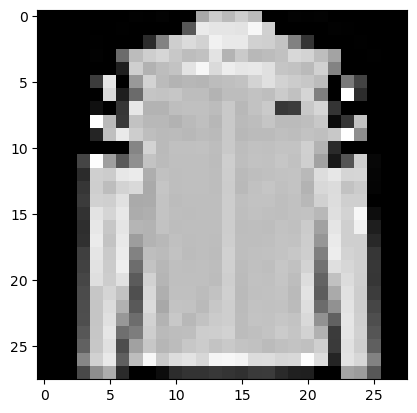

Label: 4


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")